## Gaussian Integration for Relativistic Particle on a Spring

### Physics Background

The energy of a relativistic particle, which is conserved, is given by
$$E=\frac{mc^2}{\sqrt{1-v^2/c^2}}+\frac 12 kx^2 $$
which can be rearranged to show that
$$
  v^2=c^2\left[1-\left(\frac{mc^2}{E-kx^2/2}\right)^2\right].
$$
Assume the particle started from rest, from an initial position $x_0$.
Then $E~=~mc^2~+~\frac 12 kx_0^2$ and after rearranging terms we can write the following expression for the positive root:
$$
  v=\frac{dx}{dt}=c\left\{\frac{k\left(x_0^2-x^2\right)\left[2mc^2 + k\left(x_0^2-x^2\right)/2\right]}{2\left[mc^2 + k\left(x_0^2-x^2\right)/2\right]^2}\right\}^{1/2} = g(x),
$$
where $g(x)$ is a function of $x$.

The period for the oscillation is given by four times the time taken for the particle to travel from $x=x_0$ to $x=0$.
Using separation of variables:
$$
  T = 4\int_0^{x_0}\frac{d x'}{g(x')} $$
We expect $T$ to approach $4x_0/c$

**Small-amplitude (classical) limit:**
Notice that for $k\left(x_0^2-x^2\right)/2 \ll mc^2$ we find $v\approx \sqrt{k\left(x_0^2-x^2\right)}$, as expected for an energy conserving linear harmonic oscillator.

We expect $T$ to approach $2\pi\sqrt{m/k}$ as $x_0$ approaches 0.

**Large-amplitude (highly relativistic) limit:** Notice that for $k\left(x_0^2-x^2\right)/2\gg mc^2$, $v$ approaches $c$ but remains less than $c$.

We can ask, what initial displacement $x_0 = x_c >0$ for a particle initially at rest would lead to a speed $c$ at $x=0$? The oscillator has initial potential, and therefore total, energy $kx_0^2/2$. For this energy to be entirely converted into maximum kinetic energy $mc^2/2$, you need $kx_0^2 = mc^2$. From this, we can find $x_0 = x_c = c\sqrt{\frac mk} $

### Computational Problem

  Using Gaussian quadrature, we will numerically calculate the period of the spring, and see how it transitions from the classical to the highly relativistic case.
  The idea is to calculate $T$ multiple times for a range of initial positions $x_0$, assuming a mass of $m=1$ kg and a spring constant $k=12$ N/m.

### Exercise 1

Use Gaussian Quadrature to numerically calculate the period for $N=8$ and $N=16$ for $x_0=1$ cm.

Estimate the fractional error of the calculation using these two $N$'s.

Taking the classical value as the truth, find the relative error for each of these two $N$'s.

In [1]:
# load gaussxw
from pylab import *
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
# define variables
m = 1 #kg 
k = 12 #N/m
c = 3e8 #m/s
x0 = 1e-2 # 1 cm -> m

In [90]:
# define functions for g and T
# with arguments as defined in the given expressions
def g(x, x0, m, k):
    dx = k*(x0**2 - x**2)/2
    return c*np.sqrt( dx*(2*m*c**2 + dx))/(m*c**2 + dx)

def T(N, x0, m, k):
    x, w = gaussxwab(N, 0, x0)
    return 4*np.sum(w/g(x, x0, m, k))

In [92]:
# period for N=8 and N=16
T8, T16 = T(8, x0, m, k), T(16, x0, m, k)
T8, T16

(1.7301762343365565, 1.770715490242243)

In [105]:
# fractional error
np.abs((T8-T16)/T16)

0.0228942798146192

In [94]:
# classical limit
Tc = 2*np.pi*np.sqrt(m/k)
Tc

1.8137993642342176

In [95]:
# relative error
(Tc-T8)/Tc, (Tc-T16)/Tc

(0.04610384783819052, 0.023753384658487007)

### Exercise 2

Plot the integrands $4/g_k$ and the weighted values $4w_k/g_k$ at the sampling points.

Describe how these quantities behave as the $x_0$ limit (i.e. the upper limit) of integration is approached. How do you think this behaviour might be affecting the accuracy of the integral calculation?

In [218]:
# get weights and gk for N=8
x8, w8 = gaussxwab(8, 0, x0)
gs8 = g(x8, x0, m, k)
# calculate integrand and weighted values
integrands8 = 4/gs8
weighted_vals8 = 4*w8/gs8

# get weights and gk for N=16
x16, w16 = gaussxwab(16, 0, x0)
gs16 = g(x16, x0, m, k)
# calculate integrand and weighted values
integrands16 = 4/gs16
weighted_vals16 = 4*w16/gs16

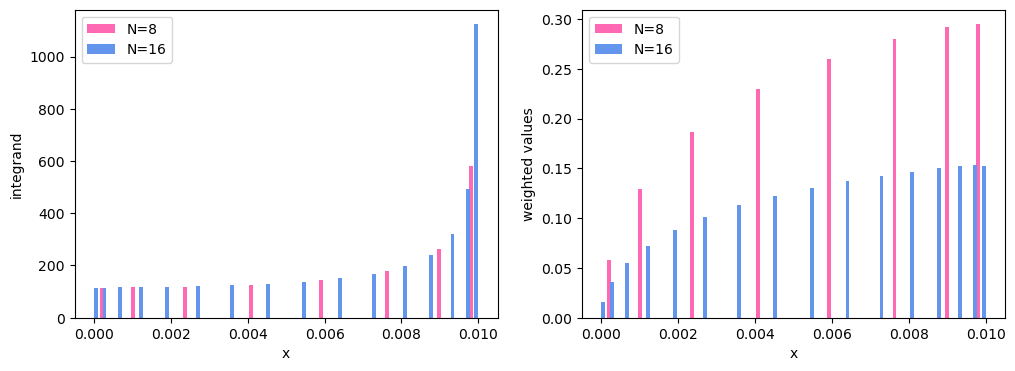

In [220]:
# plot integrand and weighted values
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].bar(x8, integrands8, width=1e-4, color="hotpink")
axs[1].bar(x8, weighted_vals8, width=1e-4, color="hotpink")
axs[0].bar(x16, integrands16, width=1e-4, color="cornflowerblue")
axs[1].bar(x16, weighted_vals16, width=1e-4, color="cornflowerblue")
# add labels for the first axis
axs[0].set_xlabel("x")
axs[0].set_ylabel("integrand")
axs[0].legend(["N=8", "N=16"])
# add labels for the second axis
axs[1].set_xlabel("x")
axs[1].set_ylabel("weighted values")
axs[1].legend(["N=8", "N=16"])

as $x_0$ is approached, the integrand tends to infinity, but the weighted values approach 0.05. At the limits of integration, the points are sampled more frequently, but the weight of each point also decreases. 

The unbounded nature of the integrand means the function is not well-behaved, and will make the integral calculation less accurate.

### Exercise 3

For this spring, $x_c \approx 8.65\times 10^{4} $ km. Plot $T$ as a function of $x_0$ for $x_0$ in the range 1m$<x<10x_c$. 

Compare it to the classical limit (show it as a horizontal line on your plot) and to the highly relativistic limit (show it as a diagonal line on your plot).

In [99]:
# define xc, number of points in plot, number of integration steps
xc = 8.65e4 * 1e3 # km -> m
nvals = 100
N = 100
# m, k, and Tc are defined in the previous exercise

# initialize array of x0s and Ts
x0s = np.linspace(1, 10*xc, nvals)
Ts = np.zeros(nvals)
# get T for each x0
for i in range(nvals):
    Ts[i] = T(N, x0s[i], m, k)

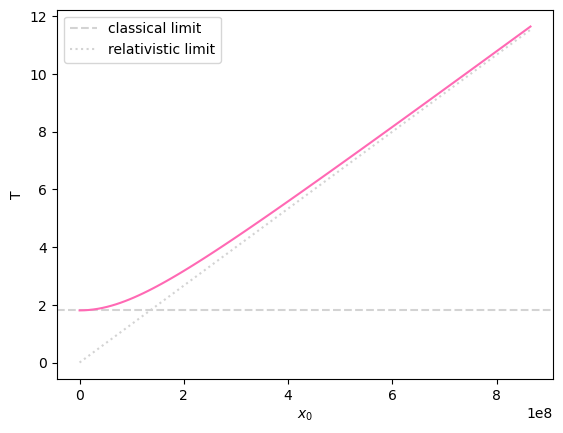

In [221]:
# plot classical and relativistic limit
plt.axhline(Tc, linestyle="--", color="lightgray", label="classical limit")
plt.plot(x0s, 4*x0s/c, linestyle=":", color="lightgray", label="relativistic limit")
# plot T vs x0
plt.plot(x0s, Ts, color="hotpink")

# add labels
plt.xlabel(f"$x_0$")
plt.ylabel("T")
plt.legend()

## Numerical Differentiation Errors

Section 5.10.2 in the textbook says the optimum step size for forward difference differentiation schemes is equal to about $\sqrt{C} \approx 10^{-8}$. Let's demonstrate this using $f(x) = e^{-x^2}$

### Exercise 4

Using a forward difference scheme, numerically find the derivative of $f(x)$ at $x=0.5$, for a range of $h$'s from $10^{-16} \rightarrow 10^0$ increasing by a factor of 10 each step. (You should have 17 values for $h$). 

For each value of $h$, take the absolute value of the relative error between the numerical result and the true answer. Plot this error as a function of $h$ on a log-log plot, which should show that the minimum is indeed at $h \approx 10^{-8}$.

In [144]:
# define the function
def f(x):
    return np.exp(-x**2)

# also define the derivative of the function to calculate the true
# value with
def dfdx(x):
    return -2*np.exp(-x**2)*x

# define function for forward difference 
def forward_difference(x, f, h):
    return (f(x+h)-f(x))/h

In [191]:
# initialize x, the true value of the derivative, and the array of hs
x = 0.5
df_true = dfdx(x)
hs_fwd = np.logspace(-16, 0, 17)

# calculate forward differences and errors
dfs_fwd = forward_difference(x, f, hs_fwd)
errs_fwd = np.abs((dfs_fwd-df_true)/df_true)

In [192]:
# get index of minimum in the array of errors
imin_fwd = np.argmin(errs_fwd)
# get the corresponding h and error
hmin_fwd, emin_fwd = hs_fwd[imin_fwd], errs_fwd[imin_fwd]

Text(0, 0.5, 'error')

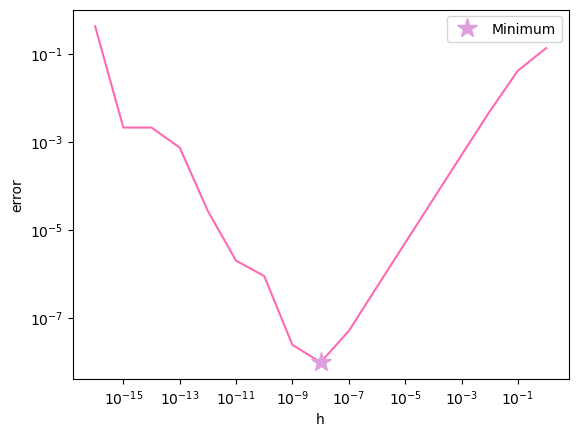

In [203]:
# plot the error vs h
plt.plot(hs_fwd, errs_fwd, color="hotpink")
plt.xscale("log")
plt.yscale("log")
plt.plot(hmin_fwd, emin_fwd, marker="*", color="plum", markersize=15, linestyle="", label="Minimum")
plt.legend()

plt.xlabel("h")
plt.ylabel("error")

As expected, the minimum is at $10^{-8}$

### Exercise 5

Repeat the previous exercise using a central difference scheme instead of the forward difference scheme.

Put the relative error of the central difference scheme (compared to the true value) onto your plot from the previous exercise. You should have two lines on the same plot, one for central difference error and one for forward difference error.

Briefly explain the key features of your plot. Does the central difference scheme always clearly beat the forward difference scheme in terms of accuracy?

In [186]:
def central_difference(x, f, h):
    return (f(x+h)-f(x-h))/(2*h)

In [198]:
x = 0.5
df_true = dfdx(x)

hs_cent = np.logspace(-16, 0, 17)
dfs_cent = central_difference(x, f, hs_cent)

errs_cent = np.abs((dfs_cent-df_true)/df_true)

In [199]:
imin_cent = np.argmin(errs_cent)
hmin_cent, emin_cent = hs_cent[imin_cent], errs_cent[imin_cent]

Text(0, 0.5, 'error')

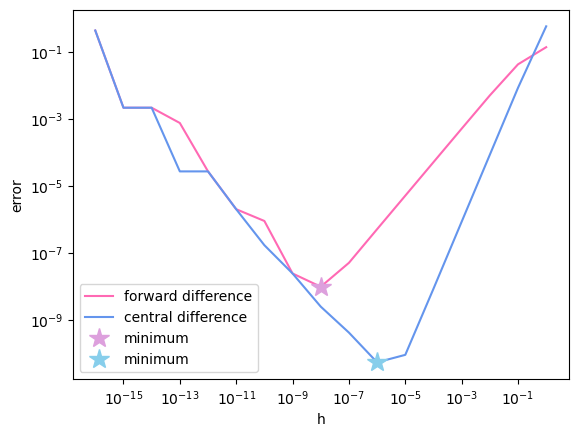

In [204]:
plt.plot(hs_fwd, errs_fwd, color="hotpink", label="forward difference")
plt.plot(hs_cent, errs_cent, color="cornflowerblue", label="central difference")
plt.xscale("log")
plt.yscale("log")
plt.plot(hmin_fwd, emin_fwd, marker="*", color="plum", markersize=15, linestyle="", label="minimum")
plt.plot(hmin_cent, emin_cent, marker="*", color="skyblue", markersize=15, linestyle="", label="minimum")
plt.legend()

plt.xlabel("h")
plt.ylabel("error")

The error in central difference and forward difference is similar for small h, where the error is dominated by roundoff error. At high h, when approximation error dominates, the central difference is more accurate then forward difference.

Central difference is able to achieve a smaller error at its optimal h. 

## Fun with interpolation

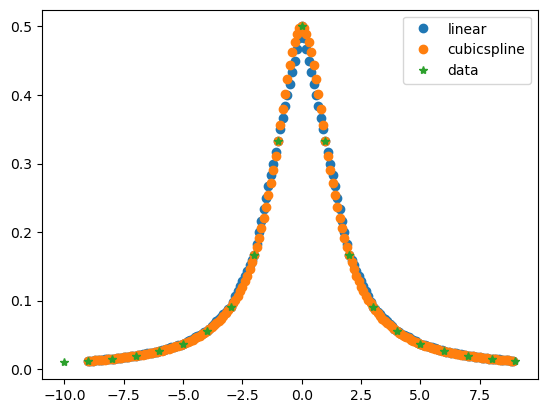

In [205]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline, interp1d

# fake data to interpolate from
x = np.arange(-10,10)
y = 1./(2.+x**2)

# points at which we want to interpolate
xs = np.arange(-9, 9, 0.1)

# Apply Linear interpolation
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# apply cubic spline
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# plot linear interpolation
plt.plot(xs, ys_lin, 'o', label='linear')
plt.plot(xs, ys_cub, 'o', label='cubicspline')
plt.plot(x, y, '*', label='data')
plt.legend()
plt.show()

### Exercise 6

Replace the definition of y in the template notebook with the following:

Show the plot. Is the cubic spline still nicer than the linear interpolation?

In [209]:
x = np.arange(-10,10)
y = 1./(1.+(2*x)**2)

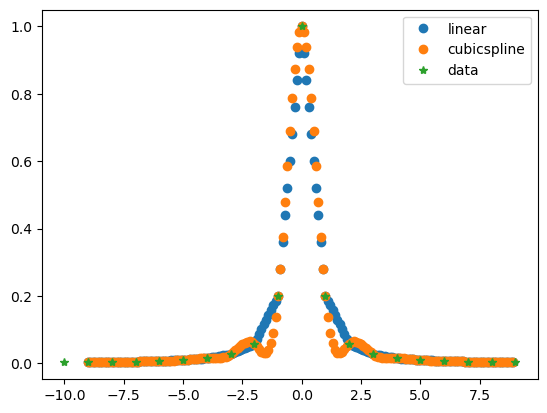

In [210]:
# points at which we want to interpolate
xs = np.arange(-9, 9, 0.1)

# Apply Linear interpolation
linear_int = interp1d(x,y)
ys_lin = linear_int(xs)

# apply cubic spline
cs = CubicSpline(x, y)
ys_cub = cs(xs)
  
# plot linear interpolation
plt.plot(xs, ys_lin, 'o', label='linear')
plt.plot(xs, ys_cub, 'o', label='cubicspline')
plt.plot(x, y, '*', label='data')
plt.legend()
plt.show()

Linear interpolation now does better than cubic spline, which seems to over fit the data